In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping

def preprocess_data(data):
    # Unpack data
    X_train_valid = data['X_train_valid']
    y_train_valid = data['y_train_valid']
    X_test = data['X_test']
    y_test = data['y_test']

    # One-hot Encoding for y data
    encoder = LabelBinarizer()
    y_train_valid = encoder.fit_transform(y_train_valid)
    y_test = encoder.fit_transform(y_test)

    # Splitting training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

    total_y_train = y_train
    total_y_val = y_val
    total_y_test = y_test

    # Trim
    X_train = X_train[:,:,0:800]
    X_val = X_val[:,:,0:800]
    X_test = X_test[:,:,0:800]

    # Maxpooling
    total_X_train = np.max(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    total_X_val = np.max(X_val.reshape(X_val.shape[0], X_val.shape[1], -1, 4), axis=3)
    total_X_test = np.max(X_test.reshape(X_test.shape[0], X_test.shape[1], -1, 4), axis=3)

    # Validation and Test Data augmentation stops here (reshaping purposes)
    # Averaging and Subsampling below only apply to Training Data

    # Average every 4 time dumps
    X_train_average = np.mean(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    X_train_average += np.random.normal(0.0, 0.5, X_train_average.shape)
    total_X_train = np.vstack((total_X_train, X_train_average))
    total_y_train = np.vstack((total_y_train, y_train))

    # Subsample every 4 time-dumps
    for i in range(0, 4):
        X_train_subsample = X_train[:, :, i::4] + np.random.normal(0.0, 0.5, X_train[:, :,i::4].shape)
        total_X_train = np.vstack((total_X_train, X_train_subsample))
        total_y_train = np.vstack((total_y_train, y_train))

    return {'total_X_train': total_X_train, 'total_X_test': total_X_test,
            'total_X_val': total_X_val, 'total_y_val': total_y_val,
            'total_y_train': total_y_train, 'total_y_test': total_y_test}

(2115, 22, 1000)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 200, 22)           4862      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 100, 22)           0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 100, 22)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 130ms/step - loss: 53.2546 - accuracy: 0.2496 - val_loss: 13.8183 - val_accuracy: 0.2708
Epoch 2/150
2/2 [==============================] - 0s 112ms/step - loss: 39.5523 - accuracy: 0.3016 - val_loss: 12.0239 - val_accuracy: 0.2500
Epoch 3/150
2/2 [==============================] - 0s 61ms/step - loss: 32.3366 - accuracy: 0.2937 - val_loss: 11.2130 - val_accuracy: 0.2708
Epoch 4/150
2/2 [==============================] - 0s 51ms/step - loss: 25.1422 - accuracy: 0.3501 - val_loss: 9.1538 - val_accuracy: 0.3750
Epoch 5/150
2/2 [==============================] - 0s 60ms/step - loss: 22.6033 - accuracy: 0.3457 - val_loss: 7.9495 - val_accuracy: 0.3125
Epoch 6/150
2/2 [==============================] - 0s 44ms/step - loss: 20.2313 - accuracy: 0.3801 - val_loss: 6.9803 - val_accuracy: 0.3542
Epoch 7/150
2/2 [==============================] - 0s 49ms/step - loss: 19.1326 - accuracy: 0.3713 - val_loss: 6.2387 - val_accuracy: 0.3542
Epoch 8/150
2/2 [===

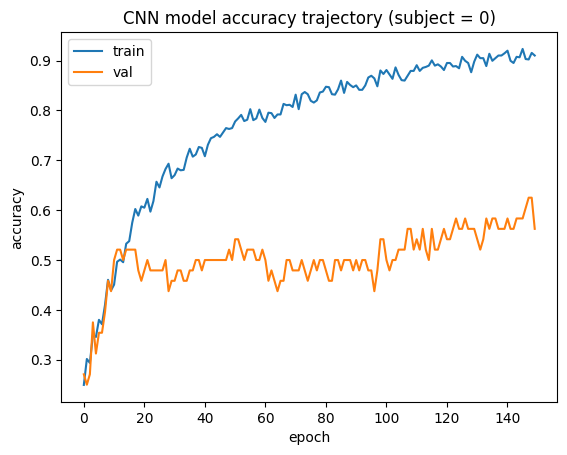

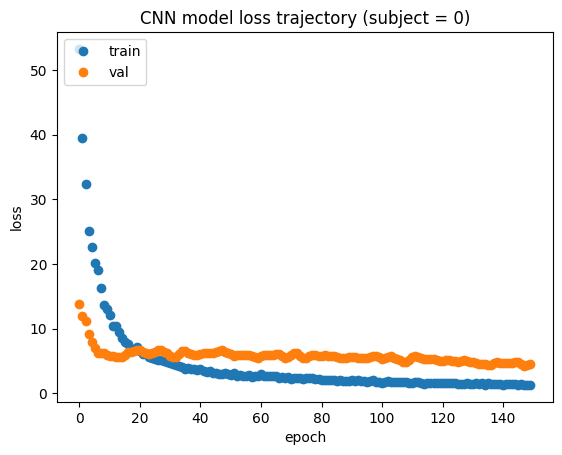

Test accuracy of the CNN model: 0.4399999976158142
(2115, 22, 1000)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 200, 22)           4862      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 100, 22)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 100, 22)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 40ms/step - loss: 31.3639 - accuracy: 0.2667 - val_loss: 6.5436 - val_accuracy: 0.3121
Epoch 2/150
16/16 [==============================] - 1s 34ms/step - loss: 15.1441 - accuracy: 0.3058 - val_loss: 4.6794 - val_accuracy: 0.3522
Epoch 3/150
16/16 [==============================] - 1s 36ms/step - loss: 9.8978 - accuracy: 0.3427 - val_loss: 3.7085 - val_accuracy: 0.4090
Epoch 4/150
16/16 [==============================] - 1s 35ms/step - loss: 7.6925 - accuracy: 0.3619 - val_loss: 3.0912 - val_accuracy: 0.4657
Epoch 5/150
16/16 [==============================] - 1s 36ms/step - loss: 6.3693 - accuracy: 0.3858 - val_loss: 2.9074 - val_accuracy: 0.4657
Epoch 6/150
16/16 [==============================] - 1s 36ms/step - loss: 5.3935 - accuracy: 0.3990 - val_loss: 2.7057 - val_accuracy: 0.5154
Epoch 7/150
16/16 [==============================] - 1s 35ms/step - loss: 4.7729 - accuracy: 0.4071 - val_loss: 2.6604 - val_accuracy: 0.4965
Epoch 8/150
16/1

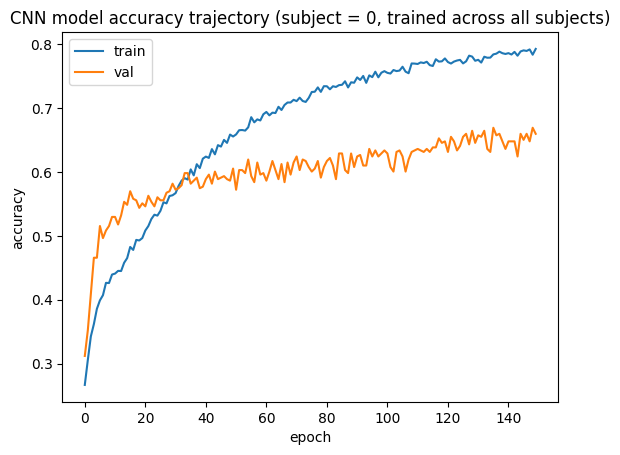

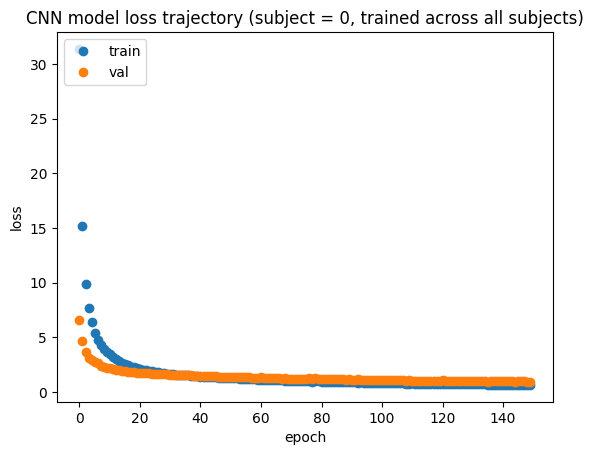

Test accuracy of the CNN model: 0.6000000238418579
(2115, 22, 1000)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 200, 22)           4862      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 100, 22)           0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 100, 22)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 113ms/step - loss: 43.3397 - accuracy: 0.2420 - val_loss: 11.9876 - val_accuracy: 0.2708
Epoch 2/150
2/2 [==============================] - 0s 43ms/step - loss: 31.9945 - accuracy: 0.2810 - val_loss: 11.3483 - val_accuracy: 0.2917
Epoch 3/150
2/2 [==============================] - 0s 45ms/step - loss: 26.7731 - accuracy: 0.2926 - val_loss: 9.2247 - val_accuracy: 0.3333
Epoch 4/150
2/2 [==============================] - 0s 44ms/step - loss: 22.0452 - accuracy: 0.3085 - val_loss: 8.1367 - val_accuracy: 0.2917
Epoch 5/150
2/2 [==============================] - 0s 45ms/step - loss: 19.4928 - accuracy: 0.3121 - val_loss: 7.6159 - val_accuracy: 0.3333
Epoch 6/150
2/2 [==============================] - 0s 47ms/step - loss: 17.0988 - accuracy: 0.3280 - val_loss: 7.0784 - val_accuracy: 0.2917
Epoch 7/150
2/2 [==============================] - 0s 42ms/step - loss: 14.7935 - accuracy: 0.3413 - val_loss: 7.0681 - val_accuracy: 0.3333
Epoch 8/150
2/2 [=====

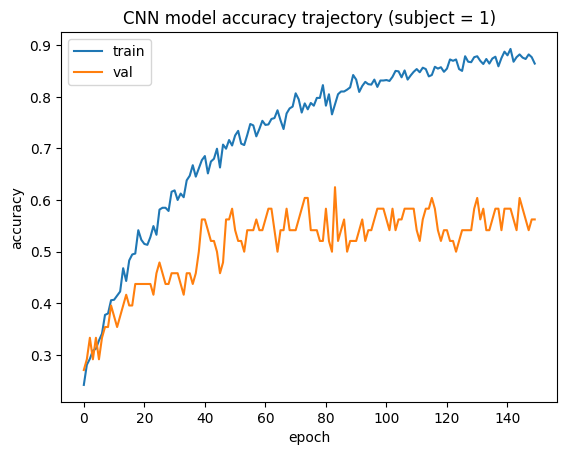

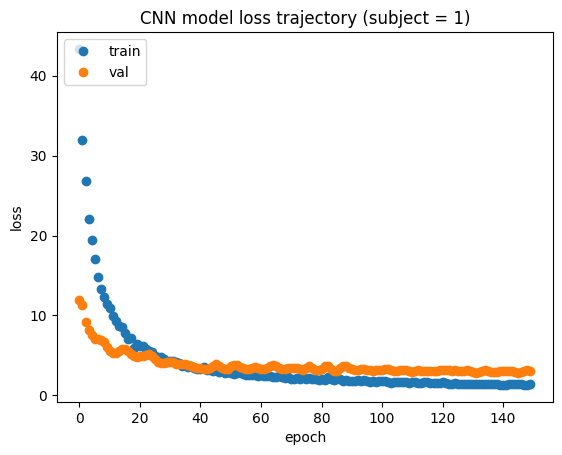

Test accuracy of the CNN model: 0.5199999809265137
(2115, 22, 1000)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 200, 22)           4862      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 100, 22)           0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 47ms/step - loss: 36.2896 - accuracy: 0.2711 - val_loss: 7.1057 - val_accuracy: 0.3381
Epoch 2/150
16/16 [==============================] - 1s 50ms/step - loss: 16.8189 - accuracy: 0.3014 - val_loss: 6.2434 - val_accuracy: 0.3546
Epoch 3/150
16/16 [==============================] - 1s 41ms/step - loss: 11.6922 - accuracy: 0.3156 - val_loss: 4.1864 - val_accuracy: 0.3853
Epoch 4/150
16/16 [==============================] - 1s 41ms/step - loss: 8.8252 - accuracy: 0.3478 - val_loss: 3.3970 - val_accuracy: 0.4303
Epoch 5/150
16/16 [==============================] - 1s 43ms/step - loss: 7.1180 - accuracy: 0.3729 - val_loss: 3.3199 - val_accuracy: 0.4681
Epoch 6/150
16/16 [==============================] - 1s 43ms/step - loss: 6.2110 - accuracy: 0.3902 - val_loss: 2.9379 - val_accuracy: 0.4468
Epoch 7/150
16/16 [==============================] - 1s 43ms/step - loss: 5.4631 - accuracy: 0.4029 - val_loss: 2.9286 - val_accuracy: 0.4894
Epoch 8/150
16/

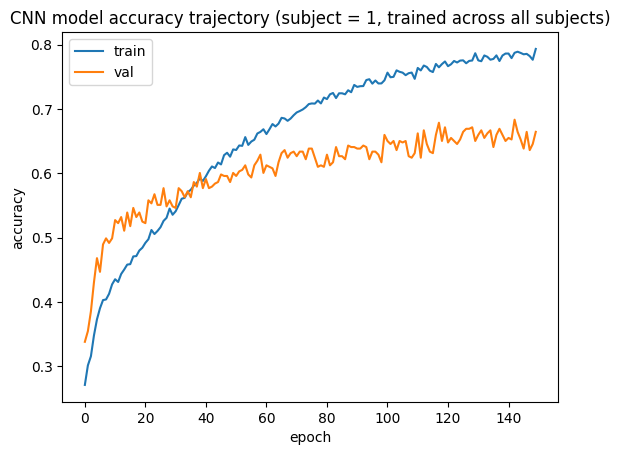

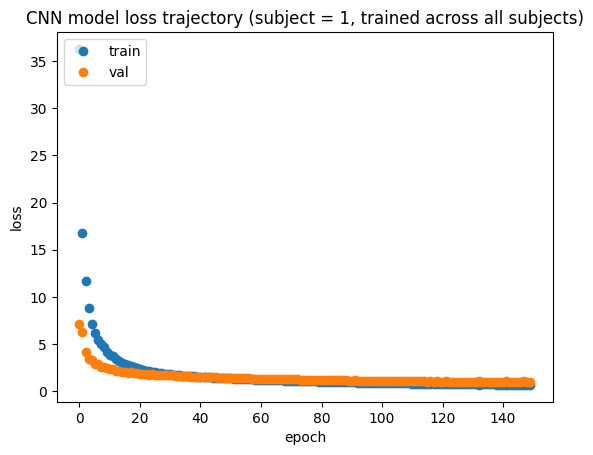

Test accuracy of the CNN model: 0.5600000023841858
(2115, 22, 1000)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 116ms/step - loss: 62.6857 - accuracy: 0.2544 - val_loss: 25.5148 - val_accuracy: 0.2292
Epoch 2/150
2/2 [==============================] - 0s 93ms/step - loss: 53.1103 - accuracy: 0.2651 - val_loss: 19.9455 - val_accuracy: 0.1875
Epoch 3/150
2/2 [==============================] - 0s 53ms/step - loss: 38.7774 - accuracy: 0.2890 - val_loss: 14.5228 - val_accuracy: 0.3333
Epoch 4/150
2/2 [==============================] - 0s 53ms/step - loss: 33.7578 - accuracy: 0.3085 - val_loss: 10.3549 - val_accuracy: 0.3542
Epoch 5/150
2/2 [==============================] - 0s 45ms/step - loss: 30.3712 - accuracy: 0.3076 - val_loss: 6.1892 - val_accuracy: 0.5208
Epoch 6/150
2/2 [==============================] - 0s 48ms/step - loss: 24.7133 - accuracy: 0.3333 - val_loss: 6.4134 - val_accuracy: 0.5000
Epoch 7/150
2/2 [==============================] - 0s 48ms/step - loss: 22.2229 - accuracy: 0.3404 - val_loss: 7.7126 - val_accuracy: 0.4792
Epoch 8/150
2/2 [===

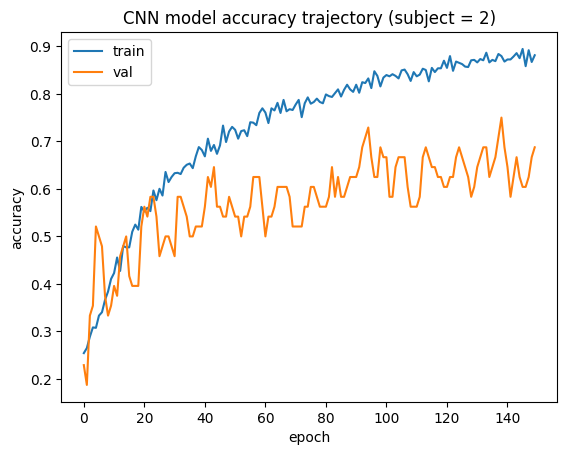

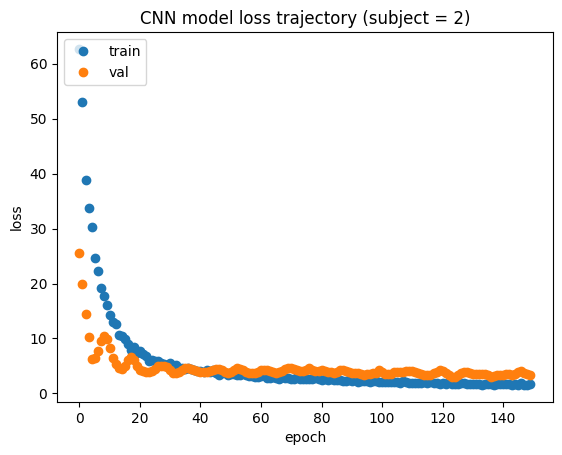

Test accuracy of the CNN model: 0.6399999856948853
(2115, 22, 1000)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 45ms/step - loss: 33.8841 - accuracy: 0.2729 - val_loss: 6.7386 - val_accuracy: 0.2931
Epoch 2/150
16/16 [==============================] - 1s 40ms/step - loss: 15.5197 - accuracy: 0.2964 - val_loss: 4.3967 - val_accuracy: 0.3688
Epoch 3/150
16/16 [==============================] - 1s 39ms/step - loss: 10.3031 - accuracy: 0.3354 - val_loss: 3.8822 - val_accuracy: 0.4255
Epoch 4/150
16/16 [==============================] - 1s 39ms/step - loss: 7.9590 - accuracy: 0.3545 - val_loss: 2.9869 - val_accuracy: 0.4799
Epoch 5/150
16/16 [==============================] - 1s 39ms/step - loss: 6.4389 - accuracy: 0.3890 - val_loss: 2.8102 - val_accuracy: 0.5012
Epoch 6/150
16/16 [==============================] - 1s 39ms/step - loss: 5.5799 - accuracy: 0.4006 - val_loss: 2.6104 - val_accuracy: 0.4894
Epoch 7/150
16/16 [==============================] - 1s 38ms/step - loss: 4.8420 - accuracy: 0.4176 - val_loss: 2.5003 - val_accuracy: 0.5225
Epoch 8/150
16/

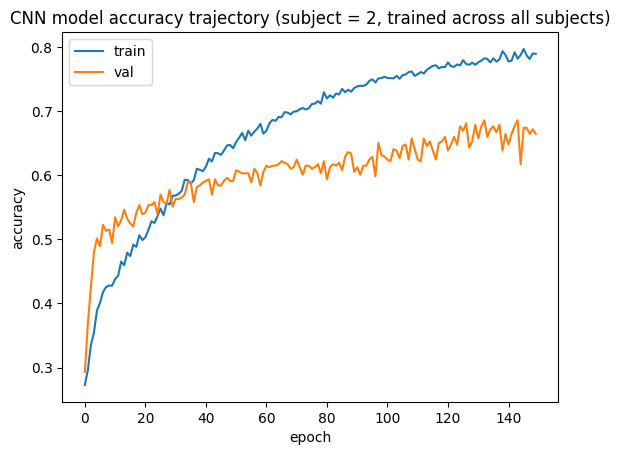

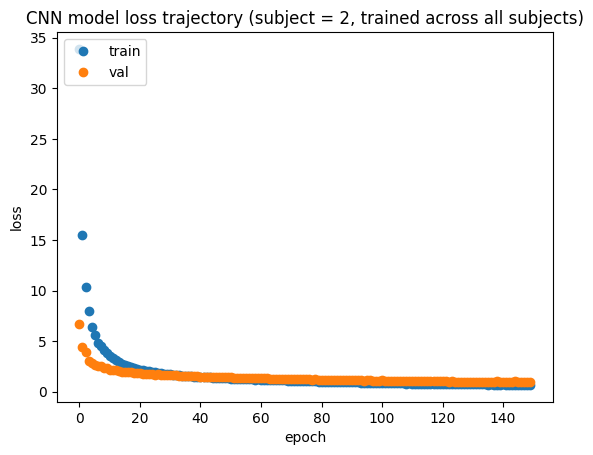

Test accuracy of the CNN model: 0.7400000095367432
(2115, 22, 1000)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 114ms/step - loss: 47.0141 - accuracy: 0.2629 - val_loss: 14.4367 - val_accuracy: 0.3404
Epoch 2/150
2/2 [==============================] - 0s 43ms/step - loss: 40.1361 - accuracy: 0.2986 - val_loss: 10.2093 - val_accuracy: 0.3191
Epoch 3/150
2/2 [==============================] - 0s 43ms/step - loss: 28.4676 - accuracy: 0.3431 - val_loss: 7.7915 - val_accuracy: 0.3830
Epoch 4/150
2/2 [==============================] - 0s 44ms/step - loss: 25.3469 - accuracy: 0.3333 - val_loss: 7.3515 - val_accuracy: 0.3830
Epoch 5/150
2/2 [==============================] - 0s 44ms/step - loss: 22.4316 - accuracy: 0.3565 - val_loss: 6.2957 - val_accuracy: 0.4043
Epoch 6/150
2/2 [==============================] - 0s 44ms/step - loss: 18.5733 - accuracy: 0.3574 - val_loss: 6.0337 - val_accuracy: 0.4468
Epoch 7/150
2/2 [==============================] - 0s 44ms/step - loss: 15.8527 - accuracy: 0.4037 - val_loss: 6.2391 - val_accuracy: 0.4681
Epoch 8/150
2/2 [=====

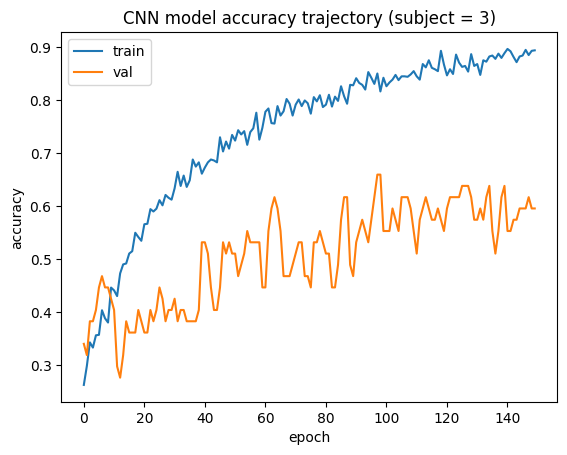

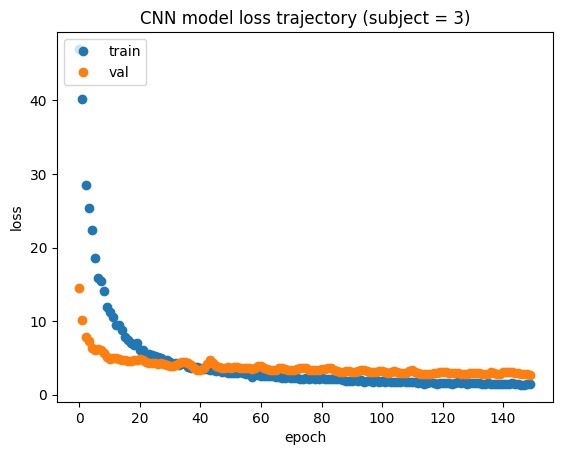

Test accuracy of the CNN model: 0.46000000834465027
(2115, 22, 1000)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_17 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 45ms/step - loss: 29.9713 - accuracy: 0.2742 - val_loss: 6.1262 - val_accuracy: 0.3191
Epoch 2/150
16/16 [==============================] - 1s 39ms/step - loss: 14.1078 - accuracy: 0.3078 - val_loss: 4.9335 - val_accuracy: 0.3641
Epoch 3/150
16/16 [==============================] - 1s 40ms/step - loss: 9.4268 - accuracy: 0.3395 - val_loss: 3.7119 - val_accuracy: 0.4137
Epoch 4/150
16/16 [==============================] - 1s 39ms/step - loss: 7.2047 - accuracy: 0.3659 - val_loss: 3.1347 - val_accuracy: 0.4681
Epoch 5/150
16/16 [==============================] - 1s 39ms/step - loss: 6.0173 - accuracy: 0.3799 - val_loss: 2.8737 - val_accuracy: 0.4634
Epoch 6/150
16/16 [==============================] - 1s 39ms/step - loss: 5.1921 - accuracy: 0.3974 - val_loss: 2.7077 - val_accuracy: 0.4681
Epoch 7/150
16/16 [==============================] - 1s 39ms/step - loss: 4.6486 - accuracy: 0.4062 - val_loss: 2.4437 - val_accuracy: 0.5035
Epoch 8/150
16/1

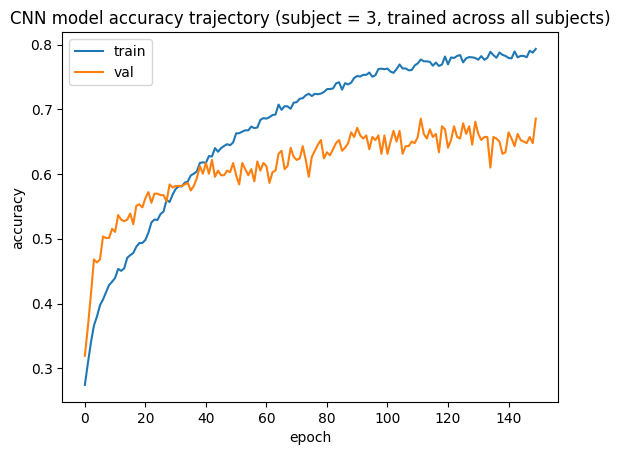

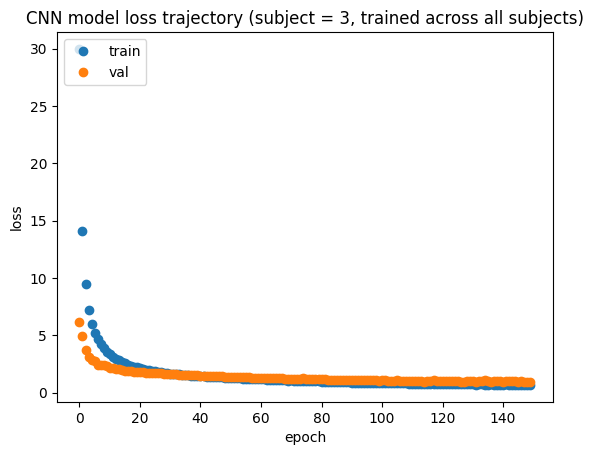

Test accuracy of the CNN model: 0.6800000071525574
(2115, 22, 1000)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 117ms/step - loss: 45.4344 - accuracy: 0.2314 - val_loss: 13.8809 - val_accuracy: 0.2340
Epoch 2/150
2/2 [==============================] - 0s 45ms/step - loss: 33.4729 - accuracy: 0.3183 - val_loss: 7.5335 - val_accuracy: 0.2340
Epoch 3/150
2/2 [==============================] - 0s 44ms/step - loss: 25.6587 - accuracy: 0.3245 - val_loss: 7.5389 - val_accuracy: 0.2553
Epoch 4/150
2/2 [==============================] - 0s 45ms/step - loss: 22.0544 - accuracy: 0.3307 - val_loss: 7.5123 - val_accuracy: 0.3617
Epoch 5/150
2/2 [==============================] - 0s 43ms/step - loss: 19.5307 - accuracy: 0.3484 - val_loss: 6.8971 - val_accuracy: 0.3617
Epoch 6/150
2/2 [==============================] - 0s 46ms/step - loss: 15.8425 - accuracy: 0.3980 - val_loss: 6.0453 - val_accuracy: 0.3830
Epoch 7/150
2/2 [==============================] - 0s 45ms/step - loss: 15.0504 - accuracy: 0.3901 - val_loss: 5.3826 - val_accuracy: 0.3617
Epoch 8/150
2/2 [======

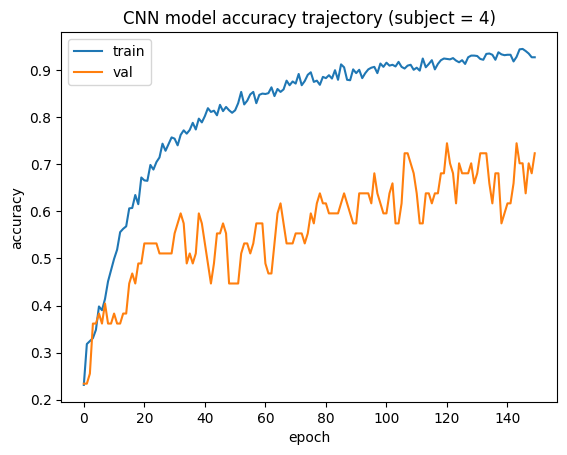

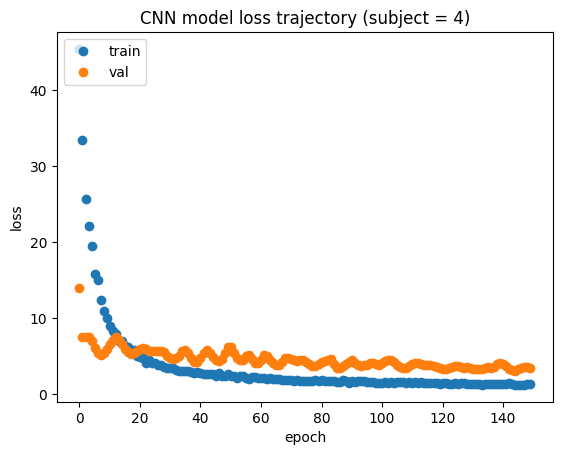

Test accuracy of the CNN model: 0.7872340679168701
(2115, 22, 1000)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_21 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 44ms/step - loss: 32.8323 - accuracy: 0.2722 - val_loss: 6.0613 - val_accuracy: 0.3286
Epoch 2/150
16/16 [==============================] - 1s 39ms/step - loss: 15.5352 - accuracy: 0.3148 - val_loss: 5.5075 - val_accuracy: 0.3735
Epoch 3/150
16/16 [==============================] - 1s 38ms/step - loss: 10.8062 - accuracy: 0.3423 - val_loss: 4.0545 - val_accuracy: 0.4090
Epoch 4/150
16/16 [==============================] - 1s 39ms/step - loss: 7.9776 - accuracy: 0.3676 - val_loss: 3.5163 - val_accuracy: 0.4184
Epoch 5/150
16/16 [==============================] - 1s 39ms/step - loss: 6.5187 - accuracy: 0.3893 - val_loss: 2.9846 - val_accuracy: 0.4799
Epoch 6/150
16/16 [==============================] - 1s 38ms/step - loss: 5.5973 - accuracy: 0.4037 - val_loss: 2.8028 - val_accuracy: 0.4894
Epoch 7/150
16/16 [==============================] - 1s 39ms/step - loss: 5.0500 - accuracy: 0.4057 - val_loss: 2.5822 - val_accuracy: 0.4917
Epoch 8/150
16/

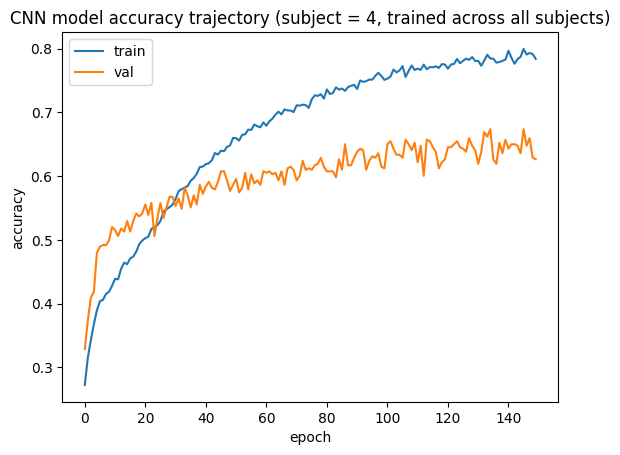

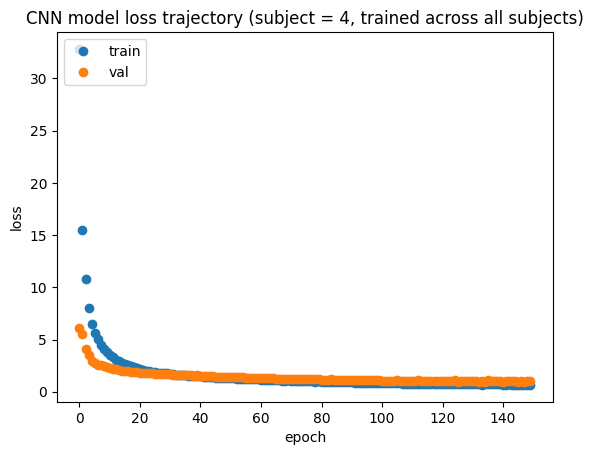

Test accuracy of the CNN model: 0.7872340679168701
(2115, 22, 1000)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_23 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 120ms/step - loss: 63.3958 - accuracy: 0.2465 - val_loss: 18.1169 - val_accuracy: 0.2917
Epoch 2/150
2/2 [==============================] - 0s 45ms/step - loss: 48.5584 - accuracy: 0.2917 - val_loss: 16.1099 - val_accuracy: 0.2500
Epoch 3/150
2/2 [==============================] - 0s 43ms/step - loss: 40.8695 - accuracy: 0.3103 - val_loss: 15.0313 - val_accuracy: 0.3125
Epoch 4/150
2/2 [==============================] - 0s 43ms/step - loss: 32.5553 - accuracy: 0.3502 - val_loss: 13.3212 - val_accuracy: 0.2292
Epoch 5/150
2/2 [==============================] - 0s 45ms/step - loss: 27.5202 - accuracy: 0.3555 - val_loss: 12.7431 - val_accuracy: 0.2500
Epoch 6/150
2/2 [==============================] - 0s 43ms/step - loss: 22.7685 - accuracy: 0.4087 - val_loss: 12.8692 - val_accuracy: 0.2500
Epoch 7/150
2/2 [==============================] - 0s 44ms/step - loss: 22.3500 - accuracy: 0.4273 - val_loss: 12.7328 - val_accuracy: 0.2500
Epoch 8/150
2/2 [

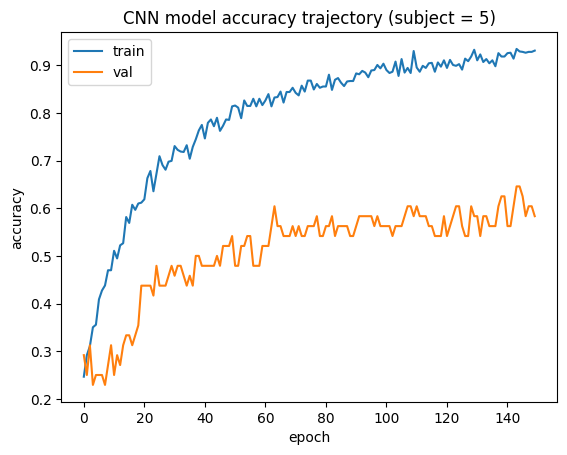

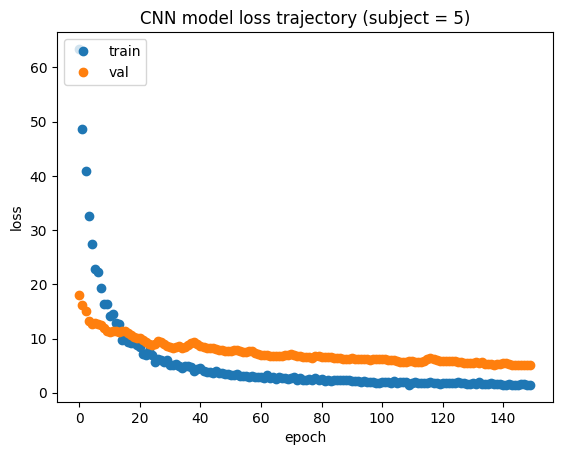

Test accuracy of the CNN model: 0.5102040767669678
(2115, 22, 1000)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_25 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 42ms/step - loss: 32.3832 - accuracy: 0.2703 - val_loss: 5.9710 - val_accuracy: 0.3168
Epoch 2/150
16/16 [==============================] - 1s 40ms/step - loss: 14.9635 - accuracy: 0.3129 - val_loss: 4.5001 - val_accuracy: 0.4043
Epoch 3/150
16/16 [==============================] - 1s 37ms/step - loss: 9.8832 - accuracy: 0.3527 - val_loss: 3.8820 - val_accuracy: 0.4421
Epoch 4/150
16/16 [==============================] - 1s 37ms/step - loss: 7.5770 - accuracy: 0.3735 - val_loss: 3.1173 - val_accuracy: 0.4752
Epoch 5/150
16/16 [==============================] - 1s 38ms/step - loss: 6.2447 - accuracy: 0.3844 - val_loss: 2.8460 - val_accuracy: 0.4846
Epoch 6/150
16/16 [==============================] - 1s 38ms/step - loss: 5.3944 - accuracy: 0.3921 - val_loss: 2.6836 - val_accuracy: 0.5035
Epoch 7/150
16/16 [==============================] - 1s 38ms/step - loss: 4.8397 - accuracy: 0.4047 - val_loss: 2.4237 - val_accuracy: 0.5106
Epoch 8/150
16/1

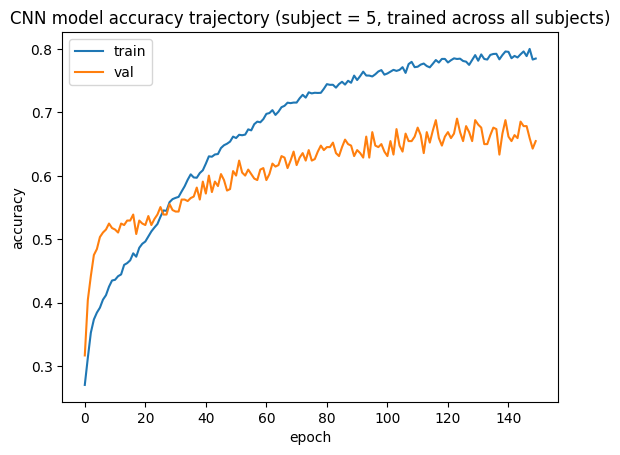

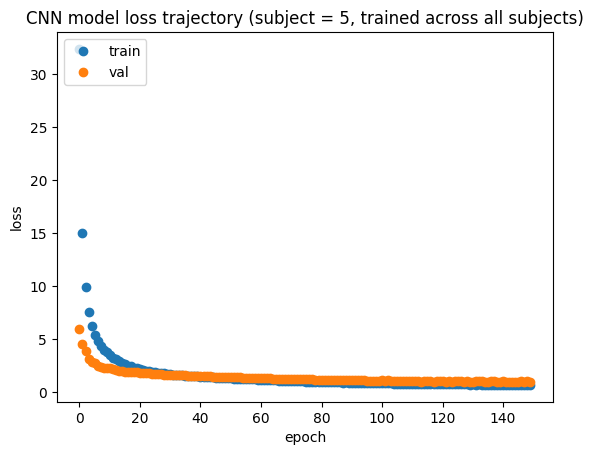

Test accuracy of the CNN model: 0.6530612111091614
(2115, 22, 1000)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_26 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_39 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_27 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_27 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 113ms/step - loss: 45.8207 - accuracy: 0.2588 - val_loss: 13.9746 - val_accuracy: 0.2708
Epoch 2/150
2/2 [==============================] - 0s 44ms/step - loss: 35.0720 - accuracy: 0.2877 - val_loss: 8.9799 - val_accuracy: 0.3542
Epoch 3/150
2/2 [==============================] - 0s 44ms/step - loss: 28.0816 - accuracy: 0.3158 - val_loss: 8.7214 - val_accuracy: 0.3750
Epoch 4/150
2/2 [==============================] - 0s 44ms/step - loss: 21.3696 - accuracy: 0.3482 - val_loss: 8.2187 - val_accuracy: 0.3542
Epoch 5/150
2/2 [==============================] - 0s 43ms/step - loss: 18.8753 - accuracy: 0.3728 - val_loss: 8.0981 - val_accuracy: 0.3750
Epoch 6/150
2/2 [==============================] - 0s 43ms/step - loss: 17.1313 - accuracy: 0.3825 - val_loss: 7.4948 - val_accuracy: 0.3542
Epoch 7/150
2/2 [==============================] - 0s 43ms/step - loss: 15.2537 - accuracy: 0.4009 - val_loss: 6.4825 - val_accuracy: 0.3958
Epoch 8/150
2/2 [======

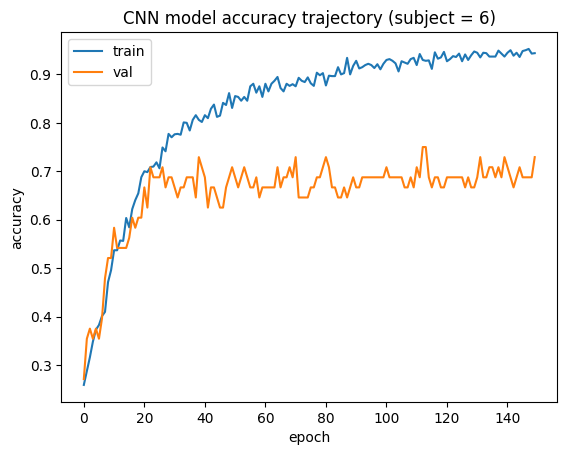

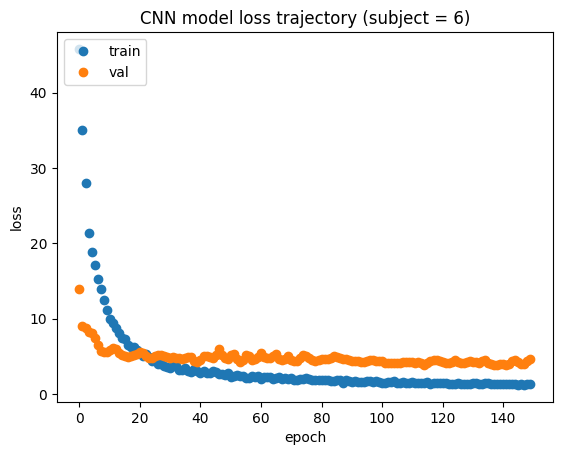

Test accuracy of the CNN model: 0.5799999833106995
(2115, 22, 1000)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_28 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_29 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_29 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 46ms/step - loss: 34.5908 - accuracy: 0.2718 - val_loss: 7.5898 - val_accuracy: 0.3191
Epoch 2/150
16/16 [==============================] - 1s 40ms/step - loss: 15.5662 - accuracy: 0.3019 - val_loss: 5.2341 - val_accuracy: 0.3452
Epoch 3/150
16/16 [==============================] - 1s 40ms/step - loss: 10.3749 - accuracy: 0.3384 - val_loss: 4.1455 - val_accuracy: 0.3830
Epoch 4/150
16/16 [==============================] - 1s 41ms/step - loss: 7.7123 - accuracy: 0.3558 - val_loss: 3.3899 - val_accuracy: 0.4255
Epoch 5/150
16/16 [==============================] - 1s 40ms/step - loss: 6.3396 - accuracy: 0.3783 - val_loss: 3.0563 - val_accuracy: 0.4515
Epoch 6/150
16/16 [==============================] - 1s 40ms/step - loss: 5.4663 - accuracy: 0.3901 - val_loss: 2.8098 - val_accuracy: 0.4397
Epoch 7/150
16/16 [==============================] - 1s 40ms/step - loss: 4.8654 - accuracy: 0.3917 - val_loss: 2.5639 - val_accuracy: 0.4610
Epoch 8/150
16/

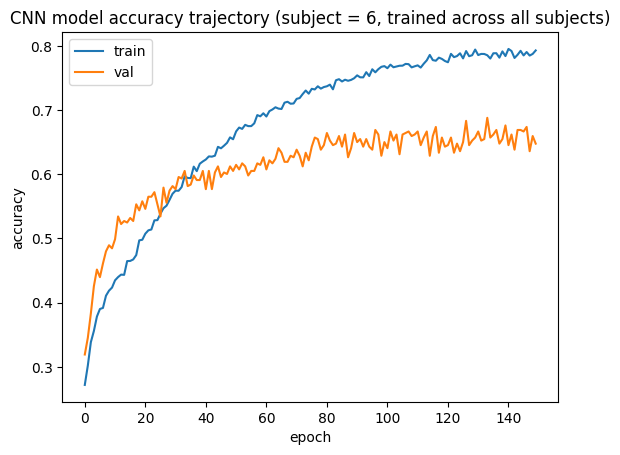

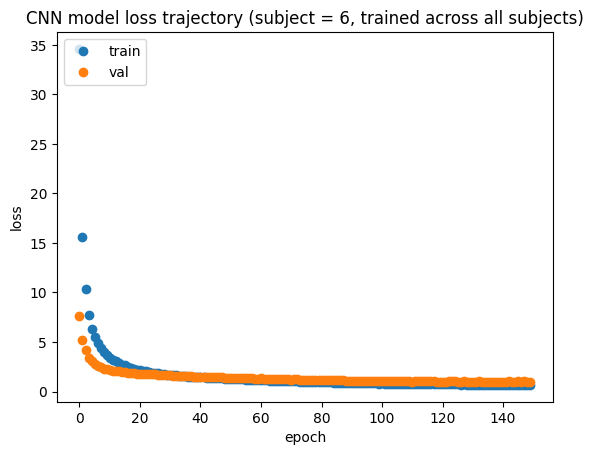

Test accuracy of the CNN model: 0.6399999856948853
(2115, 22, 1000)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_30 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_45 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_31 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_31 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_46 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 111ms/step - loss: 68.8016 - accuracy: 0.2477 - val_loss: 16.9577 - val_accuracy: 0.1915
Epoch 2/150
2/2 [==============================] - 0s 44ms/step - loss: 54.0575 - accuracy: 0.2811 - val_loss: 18.2902 - val_accuracy: 0.2553
Epoch 3/150
2/2 [==============================] - 0s 43ms/step - loss: 40.6274 - accuracy: 0.3135 - val_loss: 20.1648 - val_accuracy: 0.2553
Epoch 4/150
2/2 [==============================] - 0s 43ms/step - loss: 36.7974 - accuracy: 0.3018 - val_loss: 17.6206 - val_accuracy: 0.2553
Epoch 5/150
2/2 [==============================] - 0s 43ms/step - loss: 29.2144 - accuracy: 0.3739 - val_loss: 13.6636 - val_accuracy: 0.2766
Epoch 6/150
2/2 [==============================] - 0s 44ms/step - loss: 25.3715 - accuracy: 0.3757 - val_loss: 10.1723 - val_accuracy: 0.3617
Epoch 7/150
2/2 [==============================] - 0s 43ms/step - loss: 20.9445 - accuracy: 0.4207 - val_loss: 8.4859 - val_accuracy: 0.4468
Epoch 8/150
2/2 [=

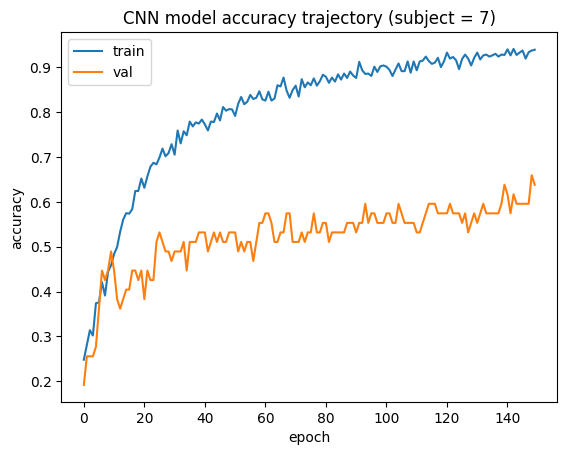

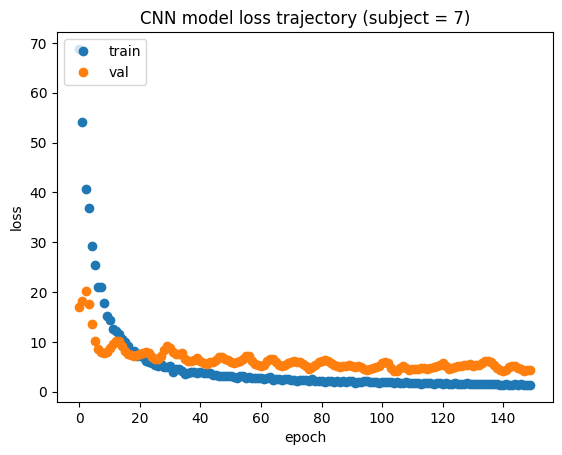

Test accuracy of the CNN model: 0.6399999856948853
(2115, 22, 1000)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_32 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_33 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_33 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 42ms/step - loss: 35.9982 - accuracy: 0.2730 - val_loss: 6.8052 - val_accuracy: 0.3310
Epoch 2/150
16/16 [==============================] - 1s 37ms/step - loss: 15.9166 - accuracy: 0.3120 - val_loss: 5.2069 - val_accuracy: 0.3830
Epoch 3/150
16/16 [==============================] - 1s 37ms/step - loss: 10.8454 - accuracy: 0.3403 - val_loss: 4.2140 - val_accuracy: 0.4232
Epoch 4/150
16/16 [==============================] - 1s 37ms/step - loss: 8.2815 - accuracy: 0.3702 - val_loss: 3.3634 - val_accuracy: 0.4539
Epoch 5/150
16/16 [==============================] - 1s 37ms/step - loss: 6.6464 - accuracy: 0.3808 - val_loss: 2.8945 - val_accuracy: 0.4492
Epoch 6/150
16/16 [==============================] - 1s 37ms/step - loss: 5.7745 - accuracy: 0.3933 - val_loss: 2.6249 - val_accuracy: 0.5177
Epoch 7/150
16/16 [==============================] - 1s 37ms/step - loss: 5.1436 - accuracy: 0.4038 - val_loss: 2.7091 - val_accuracy: 0.4586
Epoch 8/150
16/

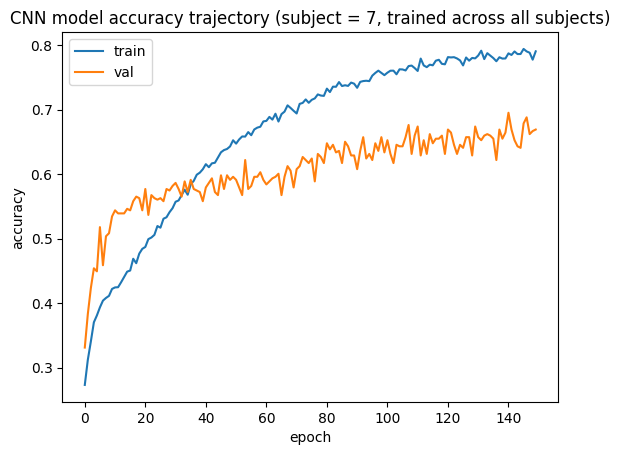

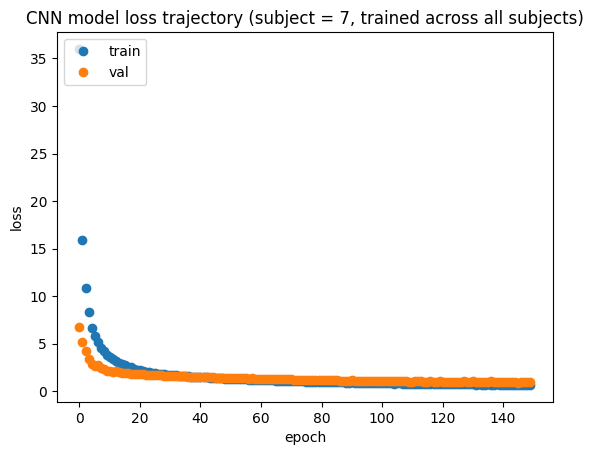

Test accuracy of the CNN model: 0.6600000262260437
(2115, 22, 1000)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_34 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_35 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_35 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_52 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 112ms/step - loss: 78.6041 - accuracy: 0.2446 - val_loss: 22.9483 - val_accuracy: 0.2553
Epoch 2/150
2/2 [==============================] - 0s 42ms/step - loss: 58.9448 - accuracy: 0.2862 - val_loss: 14.5944 - val_accuracy: 0.3404
Epoch 3/150
2/2 [==============================] - 0s 41ms/step - loss: 45.0039 - accuracy: 0.3125 - val_loss: 13.4732 - val_accuracy: 0.3191
Epoch 4/150
2/2 [==============================] - 0s 42ms/step - loss: 39.2001 - accuracy: 0.3179 - val_loss: 12.8878 - val_accuracy: 0.3191
Epoch 5/150
2/2 [==============================] - 0s 42ms/step - loss: 31.0911 - accuracy: 0.3795 - val_loss: 10.0754 - val_accuracy: 0.4043
Epoch 6/150
2/2 [==============================] - 0s 42ms/step - loss: 27.5038 - accuracy: 0.4049 - val_loss: 8.7029 - val_accuracy: 0.3830
Epoch 7/150
2/2 [==============================] - 0s 47ms/step - loss: 23.1268 - accuracy: 0.4149 - val_loss: 8.8299 - val_accuracy: 0.3617
Epoch 8/150
2/2 [==

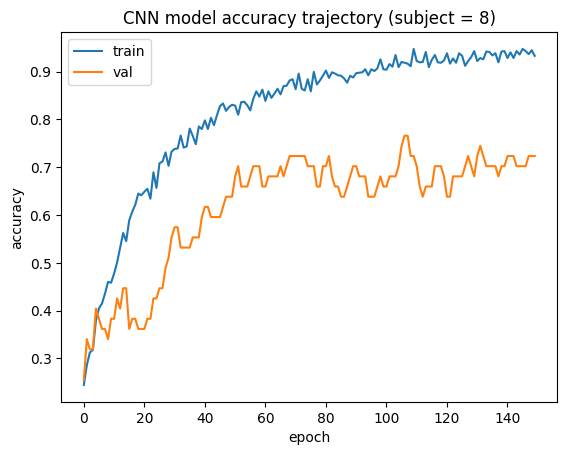

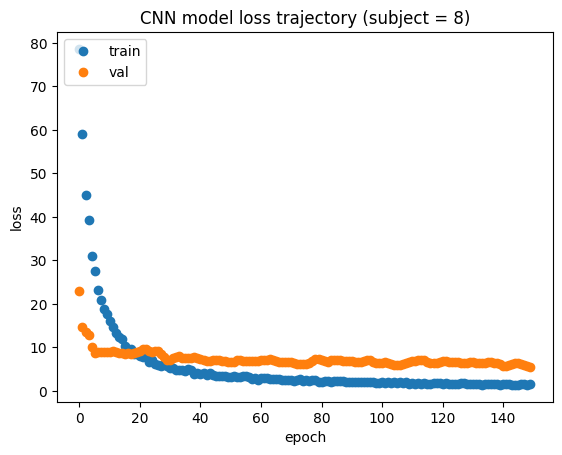

Test accuracy of the CNN model: 0.7021276354789734
(2115, 22, 1000)


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_36 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_37 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_37 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_55 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 45ms/step - loss: 31.0820 - accuracy: 0.2605 - val_loss: 6.9210 - val_accuracy: 0.2931
Epoch 2/150
16/16 [==============================] - 1s 39ms/step - loss: 14.1840 - accuracy: 0.3114 - val_loss: 4.1109 - val_accuracy: 0.4208
Epoch 3/150
16/16 [==============================] - 1s 39ms/step - loss: 9.5809 - accuracy: 0.3428 - val_loss: 3.5469 - val_accuracy: 0.4468
Epoch 4/150
16/16 [==============================] - 1s 39ms/step - loss: 7.2776 - accuracy: 0.3761 - val_loss: 3.0823 - val_accuracy: 0.4799
Epoch 5/150
16/16 [==============================] - 1s 39ms/step - loss: 5.9768 - accuracy: 0.3987 - val_loss: 2.9885 - val_accuracy: 0.4704
Epoch 6/150
16/16 [==============================] - 1s 39ms/step - loss: 5.2915 - accuracy: 0.3981 - val_loss: 2.5998 - val_accuracy: 0.5154
Epoch 7/150
16/16 [==============================] - 1s 39ms/step - loss: 4.7068 - accuracy: 0.4112 - val_loss: 2.4650 - val_accuracy: 0.5059
Epoch 8/150
16/1

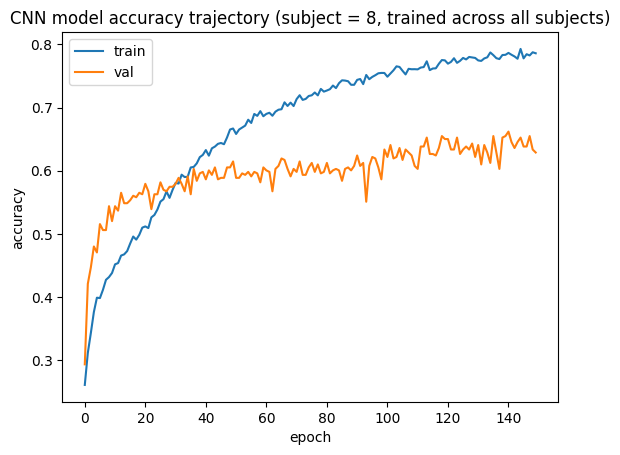

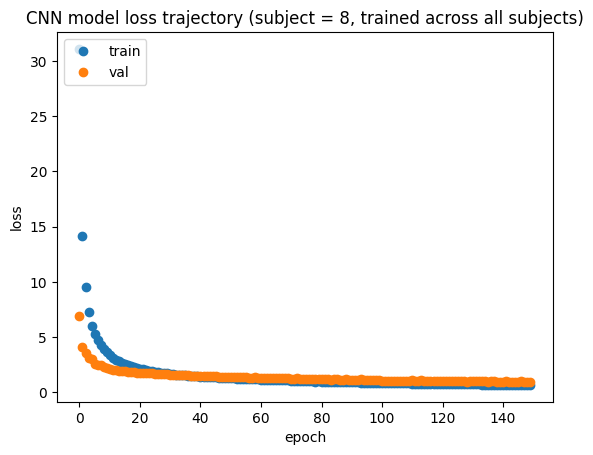

Test accuracy of the CNN model: 0.7021276354789734


In [4]:
#0 to 8 inclusive
for i in np.arange(0, 9):
    # Load original data
    X_test = np.load("../ECEC147project-data/X_test.npy")
    y_test = np.load("../ECEC147project-data//y_test.npy")
    person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
    X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
    print(X_train_valid.shape)
    y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
    person_test = np.load("../ECEC147project-data/person_test.npy")


    # Slice data by subject
    subject_train_valid_ind = np.where(person_train_valid == i)
    subject_train_valid_ind = subject_train_valid_ind[0]
    subject_X_train_valid = X_train_valid[subject_train_valid_ind]
    subject_y_train_valid = y_train_valid[subject_train_valid_ind]
    subject_test_ind = np.where(person_test == i)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]

    data = dict()
    data['X_train_valid'] = subject_X_train_valid
    data['y_train_valid'] = subject_y_train_valid
    data['X_test'] = subject_X_test
    data['y_test'] = subject_y_test
    data['person_train_valid'] = person_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    CNN = Sequential()

    CNN.add(Conv1D(22, 10, input_shape=(X_train.shape[1], X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN.add(MaxPooling1D(2))
    CNN.add(Dropout(0.5))
    CNN.add(Conv1D(22, 10, input_shape=(X_train.shape[1]/2, X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN.add(MaxPooling1D(2))
    CNN.add(Dropout(0.5))
    CNN.add(Flatten())
    CNN.add(Dense(64))
    CNN.add(Dropout(0.5))
    CNN.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    CNN.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    CNN.summary()


    CNN_results = CNN.fit(X_train, y_train, epochs=150, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(CNN_results.history['accuracy'])
    plt.plot(CNN_results.history['val_accuracy'])
    plt.title('CNN model accuracy trajectory (subject = {})'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(CNN_results.history['loss'],'o')
    plt.plot(CNN_results.history['val_loss'],'o')
    plt.title('CNN model loss trajectory (subject = {})'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    CNN_score = CNN.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the CNN model:',CNN_score[1])







    ## Now train across all subjects

    # Load original data
    X_test = np.load("../ECEC147project-data/X_test.npy")
    y_test = np.load("../ECEC147project-data//y_test.npy")
    person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
    X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
    print(X_train_valid.shape)
    y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
    person_test = np.load("../ECEC147project-data/person_test.npy")

    # Slice data by subject
    subject_test_ind = np.where(person_test == i)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]

    data = dict()
    data['X_test'] = subject_X_test
    data['y_test'] = subject_y_test
    data['person_train_valid'] = person_train_valid
    data['X_train_valid'] = X_train_valid
    data['y_train_valid'] = y_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    CNN = Sequential()

    CNN.add(Conv1D(22, 10, input_shape=(X_train.shape[1], X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN.add(MaxPooling1D(2))
    CNN.add(Dropout(0.5))
    CNN.add(Conv1D(22, 10, input_shape=(X_train.shape[1]/2, X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN.add(MaxPooling1D(2))
    CNN.add(Dropout(0.5))
    CNN.add(Flatten())
    CNN.add(Dense(64))
    CNN.add(Dropout(0.5))
    CNN.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    CNN.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    CNN.summary()


    CNN_results = CNN.fit(X_train, y_train, epochs=150, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(CNN_results.history['accuracy'])
    plt.plot(CNN_results.history['val_accuracy'])
    plt.title('CNN model accuracy trajectory (subject = {}, trained across all subjects)'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(CNN_results.history['loss'],'o')
    plt.plot(CNN_results.history['val_loss'],'o')
    plt.title('CNN model loss trajectory (subject = {}, trained across all subjects)'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    CNN_score = CNN.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the CNN model:',CNN_score[1])